# Laboratorio 3
Diana Díaz 21066
Mariel Guamuche 21150

## Configuración del entorno
1.1 Instalación de Dependencias 

In [1]:
!pip install mlflow feast scikit-learn pandas numpy matplotlib seaborn

zsh:1: command not found: pip


In [ ]:
pip install mlflow feast

1.2 Verificación de instalación

In [1]:
import mlflow
import feast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

print("mlflow.__version__", mlflow.__version__)
print("feast.__version__", feast.__version__)

mlflow.__version__ 3.5.0
feast.__version__ 0.55.0


## 2 Carga y exploración de datos

2.1 Carga del dataset

In [2]:
# 1) Asegura certifi en este mismo intérprete
import sys, os
!{sys.executable} -m pip install -q --upgrade certifi

# 2) Configura certificados para todo el proceso del kernel
import certifi, ssl
os.environ["SSL_CERT_FILE"] = certifi.where()
os.environ["SSL_CERT_DIR"]  = os.path.dirname(certifi.where())

# 3) Fuerza el contexto SSL global de urllib/https a usar certifi
_ssl_ctx = ssl.create_default_context(cafile=certifi.where())
ssl._create_default_https_context = lambda: _ssl_ctx

# (opcional) verificación rápida
print("Usando CA file:", certifi.where())


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/pty.py:95: DeprecationWarning: This process (pid=14041) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip3 install --upgrade pip
Usando CA file: /Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/certifi/cacert.pem


In [3]:
from sklearn.datasets import fetch_california_housing
# Cargar el dataset de California Housing
data = fetch_california_housing(as_frame=True)
df = data.frame
# Mostrar las primeras filas del DataFrame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
# Convertir las columnas con nombre de columnas
df.rename(columns={
    'MedInc': 'ingresos_medios',
    'HouseAge': 'promedio_edad_casas',
    'AveRooms': 'promedio_num_habitaciones',
    'AveBedrms': 'promedio_num_dormitorios',
    'Population': 'poblacion_distrito',
    'AveOccup': 'promedio_personas_casa',
    'Latitude': 'latitud',
    'Longitude': 'longitude',
    'MedHouseVal': 'target_valor_medio_casa'
}, inplace=True)   
# Mostrar las primeras filas del DataFrame con nombres modificados
df.head()

,ingresos_medios,promedio_edad_casas,promedio_num_habitaciones,promedio_num_dormitorios,poblacion_distrito,promedio_personas_casa,latitud,longitude,target_valor_medio_casa
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
# información básica del DataFrame
df.shape

(20640, 9)

In [6]:
# información básica del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ingresos_medios            20640 non-null  float64
 1   promedio_edad_casas        20640 non-null  float64
 2   promedio_num_habitaciones  20640 non-null  float64
 3   promedio_num_dormitorios   20640 non-null  float64
 4   poblacion_distrito         20640 non-null  float64
 5   promedio_personas_casa     20640 non-null  float64
 6   latitud                    20640 non-null  float64
 7   longitude                  20640 non-null  float64
 8   target_valor_medio_casa    20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Los tipos de datos son congruentes a las variables

2.2 Análisis exploratorio

In [7]:
# descripción estadística del DataFrame
df.describe()

,ingresos_medios,promedio_edad_casas,promedio_num_habitaciones,promedio_num_dormitorios,poblacion_distrito,promedio_personas_casa,latitud,longitude,target_valor_medio_casa
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [8]:
# Cantidad de valores nulos por columna
df.isnull().sum()

ingresos_medios              0
promedio_edad_casas          0
promedio_num_habitaciones    0
promedio_num_dormitorios     0
poblacion_distrito           0
promedio_personas_casa       0
latitud                      0
longitude                    0
target_valor_medio_casa      0
dtype: int64

El dataset pareciera no presentar problemas. Hay que verificar la distribución en la cantidad de habitaciones y dormitorios, ya que pareciera haber outlayers

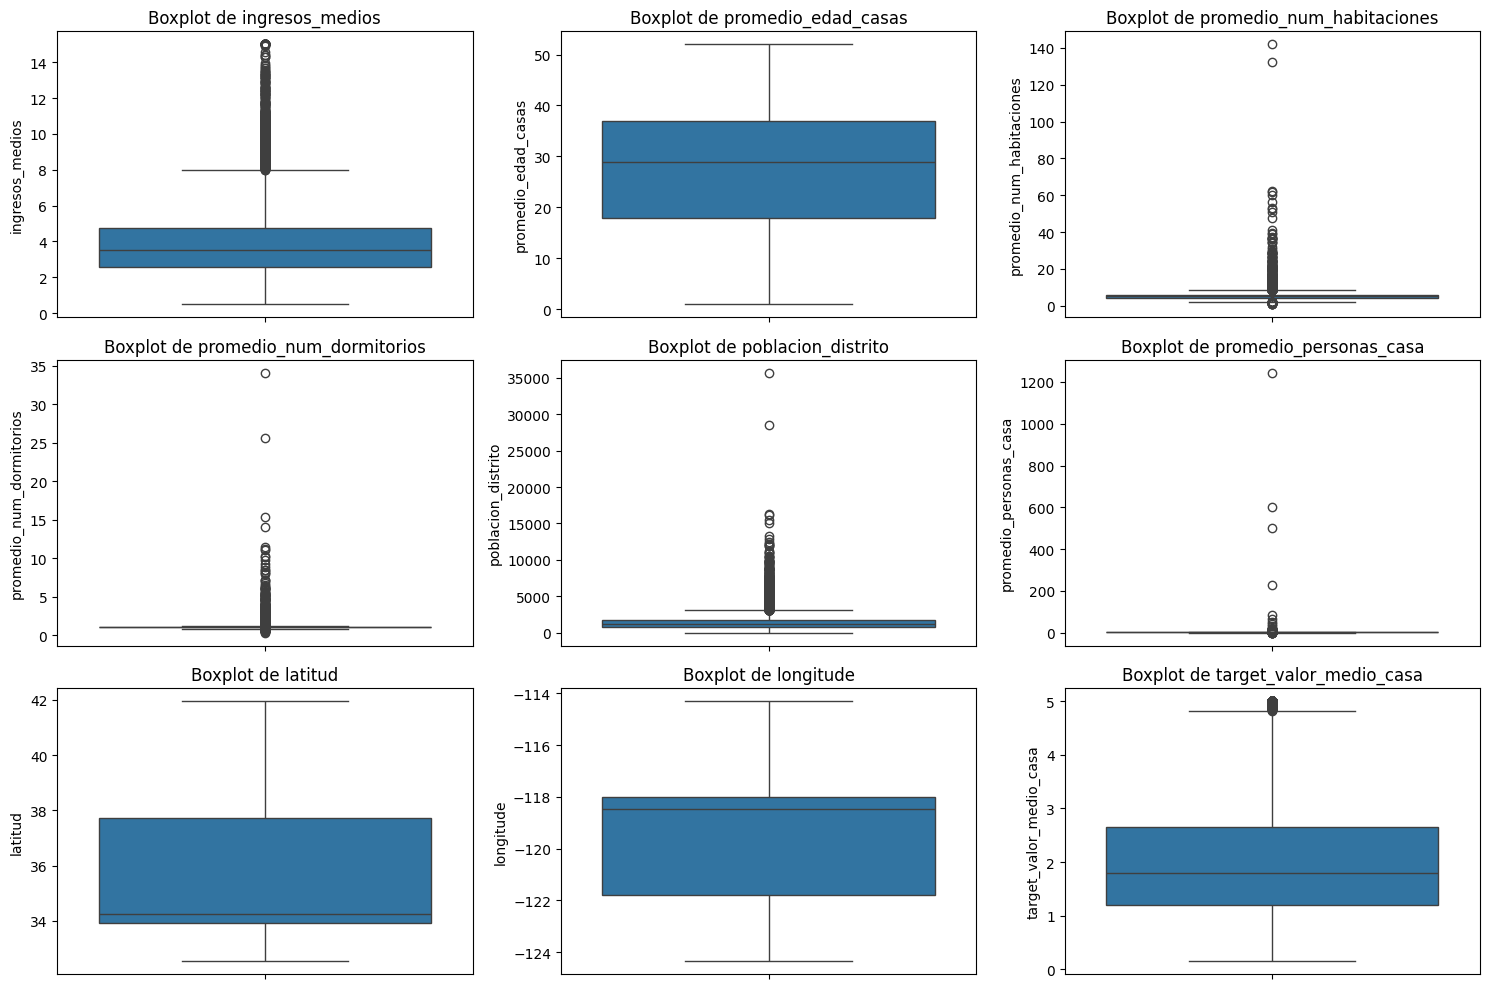

In [9]:
# Boxplots para detectar outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot de {column}')
plt.tight_layout()
plt.show()

- Los ingresos_medios presentan una distribución sesgada a la derecha; hay outlayers a partir de 10K USD.
- promedio_edad_casas presenta muchos outliers; presentando localizaciones con más de 100 habitaciones en promedio.
- promedio_num_dormitorios presenta sesgo, con outliers al igual que la variable anterior.
- poblacion_distriro alta concentración en valores bajos y algunso distritos con poblaciones con alta concentración de personas.
- promedio_personas_casa presenta sesgo, con valores poco razonables de la cantidad de personas que pueden habitar en una vivienda.
- target_valor_medio_casas: distribución moderadamente sesgada a la derecha, con pocos outliers.

Es evidente que 5 de las 9 variables tienen outlayers, dependiendo de los modelos podría convenir eliminar los outliers en especial con el de regresión lineal. Se realizará este filtrado en las variables de habitaciones y de población 

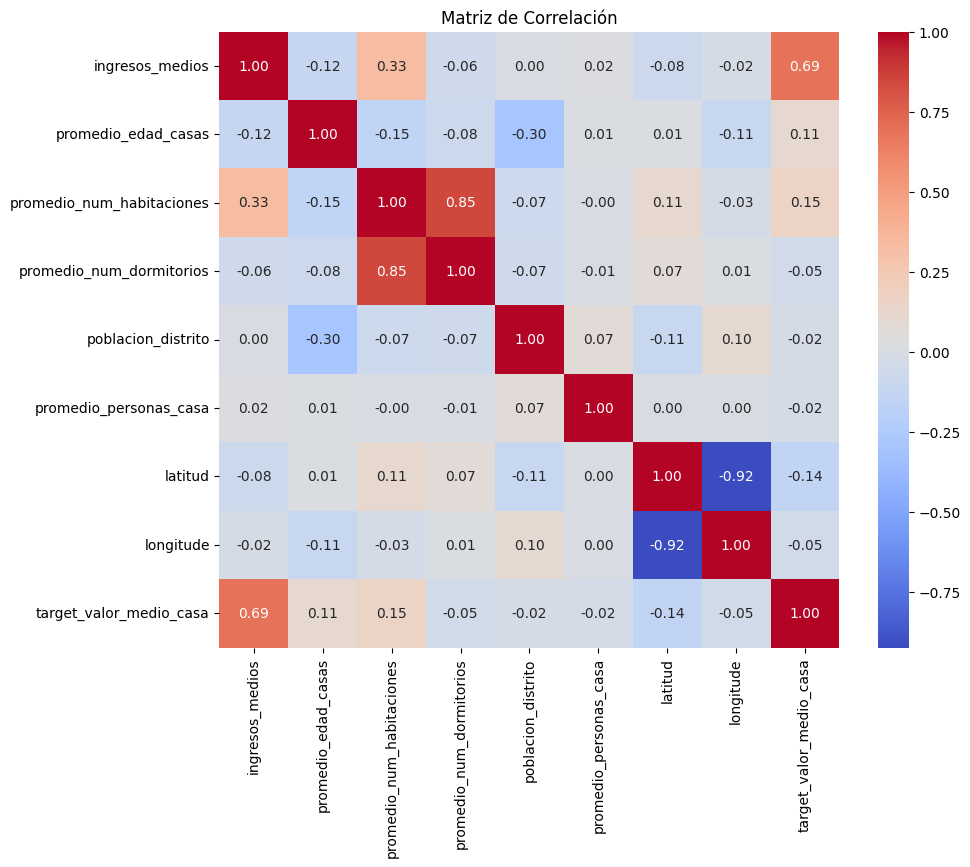

In [10]:
# Matriz de correlación
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr() 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

Las relaciones entre las variables, son fuerte entre las de carácter económico (ingresos_medios y target_valor_medio_casa), las de localización geográfica (latitud y longitud) y las de habitaciones (promedio_num_habitaciones y promedio_num_dormitorios)

## 3. Preparación de datos
3.0 Eliminación de outliers

In [11]:
filt = (
    (df["promedio_num_habitaciones"] < 50) &   # evitar promedios irreales
    (df["promedio_personas_casa"]   < 15) &    # evitar divisiones pequeñas
    (df["promedio_num_dormitorios"] < 10)      # por coherencia con habitaciones
)
df_clean = df.loc[filt].reset_index(drop=True)
print(df.shape, "->", df_clean.shape)
df_clean.describe()

(20640, 9) -> (20611, 9)


,ingresos_medios,promedio_edad_casas,promedio_num_habitaciones,promedio_num_dormitorios,poblacion_distrito,promedio_personas_casa,latitud,longitude,target_valor_medio_casa
count,20611.000000,20611.000000,20611.000000,20611.000000,20611.000000,20611.000000,20611.000000,20611.000000,20611.000000
mean,3.870846,28.641017,5.397109,1.089819,1424.541070,2.927035,35.630314,-119.569653,2.068853
std,1.899354,12.582577,1.858310,0.314566,1128.840143,0.813899,2.135323,2.003912,1.153895
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.564150,18.000000,4.440403,1.006095,788.000000,2.429869,33.930000,-121.800000,1.196000
50%,3.534700,29.000000,5.228571,1.048721,1166.000000,2.817778,34.260000,-118.490000,1.798000
75%,4.743700,37.000000,6.051208,1.099371,1724.000000,3.280652,37.710000,-118.010000,2.649000
max,15.000100,52.000000,41.333333,9.703704,35682.000000,14.000000,41.950000,-114.310000,5.000010


3.1 Feature engineering
Las variables que implementarán son:
- ratio_habitaciones_hogar indica el tamaño medio del hogar por persona (espacio disponible), se pensaría que las zonas con más espacio por persona tienen precios más altos
- ratio_habitaciones_poblacion es la densidad de habitaciones por cantidad total de personas.
- ratio_dormitorios_habitacion es la proporción de dormitorios respecto a habitaciones totales
- ingreso_persona es el nivel de ingreso ajustado por cantidad promedio de personas

In [12]:
# Ratios espaciales y socioeconómicos
df_clean["ratio_habitaciones_hogar"] = (
    df_clean["promedio_num_habitaciones"] / df_clean["promedio_personas_casa"]
)

df_clean["ratio_habitaciones_poblacion"] = (
    df_clean["promedio_num_habitaciones"] / df_clean["poblacion_distrito"]
)

df_clean["ratio_dormitorios_habitacion"] = (
    df_clean["promedio_num_dormitorios"] / df_clean["promedio_num_habitaciones"]
)

df_clean["ingreso_persona"] = (
    df_clean["ingresos_medios"] / df_clean["promedio_personas_casa"]
)

# Reemplazar valores infinitos o nulos por mediana
df_clean.replace([np.inf, -np.inf], np.nan, inplace=True)
df_clean.fillna(df_clean.median(numeric_only=True), inplace=True)

3.2 División de datos

Este punto se ha realizado después y no antes de definir las features por simplicidad

In [13]:
from sklearn.model_selection import train_test_split
# Separar características y variable objetivo
X = df_clean.drop('target_valor_medio_casa', axis=1)
y = df_clean['target_valor_medio_casa']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)
print("Tamaño del conjunto de entrenamiento (y):", y_train.shape)
print("Tamaño del conjunto de prueba (y):", y_test.shape)

Tamaño del conjunto de entrenamiento: (16488, 12)
Tamaño del conjunto de prueba: (4123, 12)
Tamaño del conjunto de entrenamiento (y): (16488,)
Tamaño del conjunto de prueba (y): (4123,)


## 4. Experimentación con MLFlow
4.1 Configuración de MLFlow

Se ha decidido conectar con databricks

In [17]:
import mlflow.sklearn
import mlflow
from pathlib import Path

# configurar tracking URI de MLFlow
mlruns_dir = Path("mlruns").absolute()
mlflow.set_tracking_uri(mlruns_dir.as_uri())
mlflow.set_experiment("california-housing-prediction")

2025/10/19 17:22:29 INFO mlflow.tracking.fluent: Experiment with name 'california-housing-prediction' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///Users/dianadiaz/Documents/GitHub/CC3105-Lab3/mlruns/332047298175356553', creation_time=1760916149469, experiment_id='332047298175356553', last_update_time=1760916149469, lifecycle_stage='active', name='california-housing-prediction', tags={}>

4.2 Entrenamiento de Modelos

Se utilizarán los modelos de regresión lineal, random forest regressor y gradient boosting regressor

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

# Función de entrenamiento y logging
def train_and_log(model, model_name, params=None):
    with mlflow.start_run(run_name=model_name):
        if params:
            mlflow.log_params(params)
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

        metrics = {
            "RMSE": root_mean_squared_error(y_test, preds),
            "MAE": mean_absolute_error(y_test, preds),
            "R2": r2_score(y_test, preds)
        }

        mlflow.log_metrics(metrics)
        mlflow.sklearn.log_model(model, model_name)
        print(f"{model_name} ->", metrics)
        return model, metrics

# Entrenamiento de tres modelos
lin_params = {}
rf_params = {"n_estimators": 300, "max_depth": 12, "random_state": 42}
gb_params = {"n_estimators": 300, "learning_rate": 0.05, "max_depth": 3, "random_state": 42}

model_lin, metrics_lin = train_and_log(LinearRegression(), "LinearRegression", lin_params)
model_rf, metrics_rf = train_and_log(RandomForestRegressor(**rf_params), "RandomForestRegressor", rf_params)
model_gb, metrics_gb = train_and_log(GradientBoostingRegressor(**gb_params), "GradientBoostingRegressor", gb_params)

2025/10/19 17:23:44 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/19 17:23:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


LinearRegression -> {'RMSE': 0.66161734339315, 'MAE': 0.47700876299384204, 'R2': 0.6763140313986364}


2025/10/19 17:24:19 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/19 17:24:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


RandomForestRegressor -> {'RMSE': 0.49590564542340554, 'MAE': 0.3237692975089411, 'R2': 0.8181521309923928}


2025/10/19 17:24:38 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/19 17:24:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


GradientBoostingRegressor -> {'RMSE': 0.5135482791803487, 'MAE': 0.3503129031674869, 'R2': 0.804982911657333}


In [19]:
from datetime import datetime, timedelta

In [20]:
repo = Path("feature_repo")
data_dir = repo / "data"
os.makedirs(data_dir, exist_ok=True)

In [22]:
# Guardar parquet con entity y timestamp
df_fs = df_clean.copy().reset_index(drop=True)
df_fs["house_id"] = np.arange(len(df_fs))
df_fs["event_timestamp"] = pd.Timestamp.utcnow()

In [40]:
# Aplica cambios al registry
!cd feature_repo && feast apply

!cd feature_repo && feast materialize $(date -u -v-1d +"%Y-%m-%dT%H:%M:%SZ") $(date -u +"%Y-%m-%dT%H:%M:%SZ") 2>/dev/null || \
cd feature_repo && feast materialize $(python3 - <<'PY'\nfrom datetime import datetime, timedelta;import sys\nprint((datetime.utcnow()-timedelta(days=1)).strftime('%Y-%m-%dT%H:%M:%SZ'))\nprint(datetime.utcnow().strftime('%Y-%m-%dT%H:%M:%SZ'))\nPY | awk 'NR==1{start=$0} NR==2{end=$0} END{print "feast materialize " start " " end}' )


No project found in the repository. Using project name california_lab defined in feature_store.yaml
Applying changes for project california_lab
Created project california_lab
Created entity house_id
Created feature view california_features

Created sqlite table california_lab_california_features

zsh:1: parse error near `)'


In [44]:
try:
    from feast import FeatureStore
    store = FeatureStore(repo_path="feature_repo")
    # Tomar 5 entidades
    entity_df = pd.DataFrame({"house_id": list(range(5))})
    feats = store.get_historical_features(
        entity_df=entity_df.assign(event_timestamp=pd.Timestamp.utcnow()),
        features=[
            "california_features:MedInc",
            "california_features:HouseAge",
            "california_features:AveRooms",
            "california_features:AveBedrms",
            "california_features:Population",
            "california_features:AveOccup",
            "california_features:Latitude",
            "california_features:Longitude",
            "california_features:ratio_rooms_house",
            "california_features:ratio_rooms_pop",
            "california_features:ratio_bed_per_room",
        ],
    ).to_df()
    print("Features recuperadas:")
    display(feats.head())
except Exception as e:
    print("Feast no disponible para ejecutar store.get_historical_features(). Detalle:", e)


Features recuperadas:


,house_id,event_timestamp,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,ratio_rooms_house,ratio_rooms_pop,ratio_bed_per_room
0,0,2025-10-20 00:13:31.183686+00:00,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,2.732919,0.021690,0.146591
1,1,2025-10-20 00:13:31.183686+00:00,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,2.956685,0.002598,0.155797
2,2,2025-10-20 00:13:31.183686+00:00,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,2.957661,0.016710,0.129516
3,3,2025-10-20 00:13:31.183686+00:00,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,2.283154,0.010425,0.184458
4,4,2025-10-20 00:13:31.183686+00:00,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,2.879646,0.011118,0.172096
